<a href="https://colab.research.google.com/github/mselmasry/Dojo-Project2/blob/main/Project02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url1 = 'https://media.githubusercontent.com/media/mselmasry/Dojo-Project2/main/creditcard.csv'
url2 = 'https://raw.githubusercontent.com/mselmasry/Dojo-Project2/main/Retail_Dataset2.csv'
Dataset1Source = 'The source of the data is: https://www.kaggle.com/mlg-ulb/creditcardfraud, It is Credit Card Fraud Data'
Dataset2Source = 'The source of the data is: https://www.kaggle.com/tevecsystems/retail-sales-forecasting , It is used for forecasting retail demand'

In [3]:
cc_df = pd.read_csv(url1)
retail_df = pd.read_csv(url2)

## Dataset 2

In [4]:
print(f'{Dataset1Source}\n')
cc_df.head(2)

The source of the data is: https://www.kaggle.com/mlg-ulb/creditcardfraud, It is Credit Card Fraud Data



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


> The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

>It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

>Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

> Target is **Class**

> Problem is a **Classification** one

In [5]:
print(f'Number of features: {len(cc_df.columns)-1}')

Number of features: 30


In [6]:
print(f'Number of Rows: {len(cc_df)}')

Number of Rows: 284807


## Dataset 2

In [7]:
print(f'{Dataset2Source}\n')
retail_df.head(2)

The source of the data is: https://www.kaggle.com/tevecsystems/retail-sales-forecasting , It is used for forecasting retail demand



,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85


> This **dataset** contains lot of historical sales data. It was extracted from a Brazilian top retailer and has many SKUs and many stores. The data was transformed to protect the identity of the retailer.

> Target is **order_demand**

In [8]:
print(f'Number of features: {len(retail_df.columns)-1}')

Number of features: 10


In [9]:
print(f'Number of Rows: {len(retail_df)}')

Number of Rows: 169211


## Data Cleaning: Credit Card Fraud

In [10]:
cc_df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [11]:
len(cc_df)

284807

In [12]:
cc_df.duplicated().sum()

1081

In [13]:
cc_df.drop_duplicates(inplace=True)

In [14]:
cc_df.duplicated().sum()

0

In [15]:
cc_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
corr = cc_df.corr()

In [21]:
print(corr)

            Time        V1        V2  ...       V28    Amount     Class
Time    1.000000  0.117927 -0.010556  ... -0.009305 -0.010559 -0.012359
V1      0.117927  1.000000  0.006875  ... -0.004861 -0.230105 -0.094486
V2     -0.010556  0.006875  1.000000  ...  0.001611 -0.533428  0.084624
V3     -0.422054 -0.008112  0.005278  ... -0.000134 -0.212410 -0.182322
V4     -0.105845  0.002257 -0.001495  ...  0.000231  0.099514  0.129326
V5      0.173223 -0.007036  0.005210  ... -0.000820 -0.387685 -0.087812
V6     -0.063279  0.000413 -0.000594  ...  0.000925  0.216389 -0.043915
V7      0.085335 -0.009173  0.007425  ...  0.001657  0.400408 -0.172347
V8     -0.038203 -0.001168  0.002899  ... -0.000099 -0.104662  0.033068
V9     -0.007861  0.001828 -0.000274  ...  0.005591 -0.044123 -0.094021
V10     0.031068  0.000815  0.000620  ...  0.009159 -0.102255 -0.206971
V11    -0.248536  0.001028 -0.000633  ...  0.002562 -0.000015  0.149067
V12     0.125500 -0.001524  0.002266  ... -0.000613 -0.009254 -0

Moderate->Strong Correlations:
- Amount & V2 -> Positive
- Amount & V5 -> Negative
- Amount & V6 -> Positive
- Amount & V7 -> Positive
- Amount & V20 -> Positive
- Time & V3 -> Positive
- V11 & V12, V14, V16, V17 -> Negative
- V12 & V14, V16, V17, V18 -> Positive
- V18 & V17 -> Positive

In [ ]:
cc_df['Class'].value_counts(normalize=True)

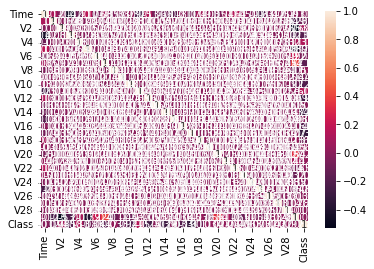

In [17]:
%%time
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax);

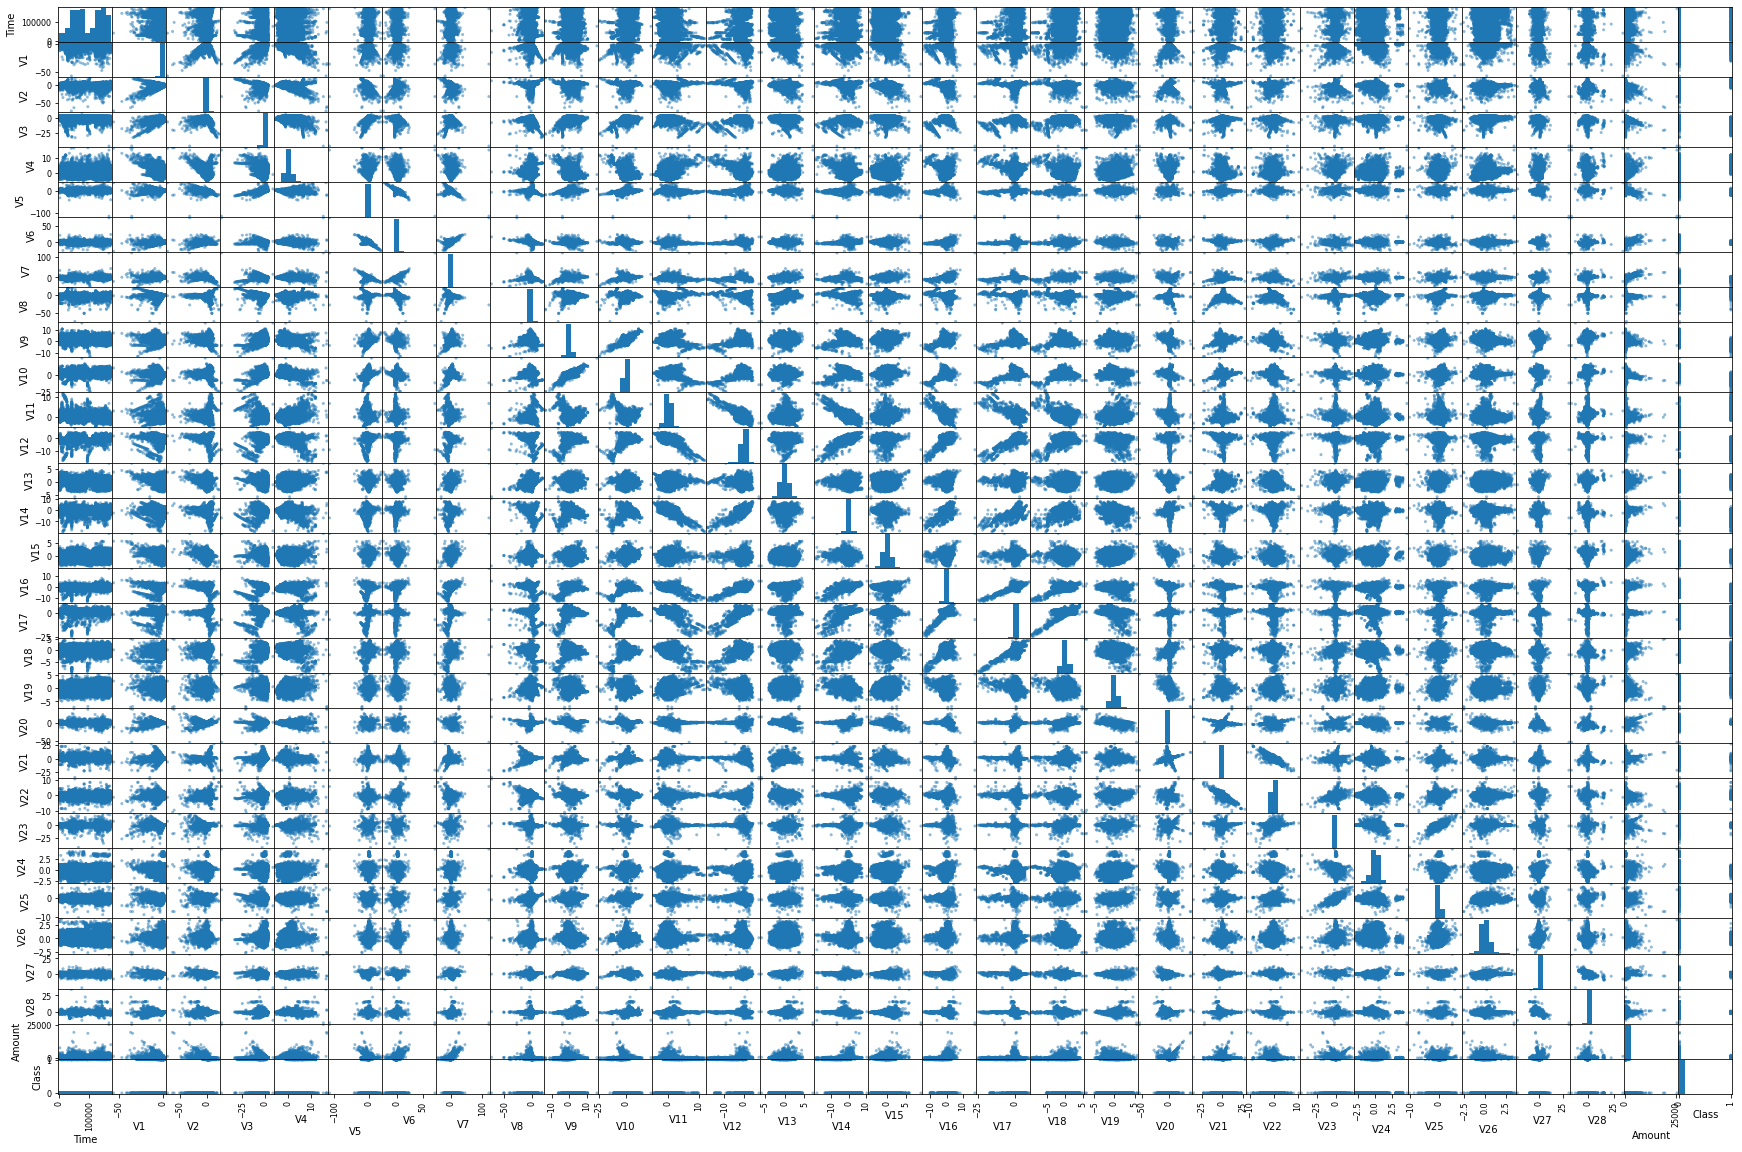

In [18]:
pd.plotting.scatter_matrix(cc_df,figsize=(30,20));

In [ ]:
cc_df['Class'].plot(kind='bar')

In [ ]:
cc_df['Amount'].plot(kind='bar')

In [ ]:
cc_df['V1'].plot(kind=bar)

In [ ]:
cc_df['V2'].plot(kind=bar)

In [ ]:
cc_df['V3'].plot(kind=bar)

In [ ]:
cc_df['V4'].plot(kind=bar)

In [ ]:
cc_df['V5'].plot(kind=bar)

In [ ]:
cc_df.boxplot(column='Amount', by='Class',rot=90);

### Due to the size of the data, executing each plot command takes 30+ minutes. Due to the relatively shorter time available to us for submission this week, I only wrote the code for several of the commands required to meet this week's requirements but did not execute them which I will do and resubmit as soon as execution is completed or I find a faster way for executing the code.